# PNA Impact to be shared with DH

In [1]:
import os
import numpy as np  
import pandas as pd
import sys

# Add the path from src
src_path = os.path.abspath(os.path.join(os.getcwd(),'..','..'))
sys.path.append(src_path)

from src import dataframe_visualizer
from src import query_engines

q = query_engines.QueryEngines()

# GMV Loss Evolution

In [2]:
QUERY_NAME = 'gmv_loss.sql' # With sql
START_DATE = "'2023-09-01'"
END_DATE = "'2025-02-01'"
STORE_ADDRESSES_IDS = "481372, 481369, 543200, 481365"


params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
    {'name':'sad_ids', 'value': str(STORE_ADDRESSES_IDS)}
]

q.prepare_query(
    QUERY_NAME
    ,params=params
    ,to_load_file=QUERY_NAME
    ,load_from_to_load_file=QUERY_NAME
    
)

df  = q.query_run_starburst()
df.head()

/Users/jordicremades/Documents/repos/central-node/src/query_engines.py:105: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


,p_creation_date,order_id,order_final_status,order_cancel_reason,customer_id,store_address_id,order_vertical,order_city_code,order_country_code,order_exchange_rate_to_eur,...,gmv_variation_total_removal_local,gmv_variation_total_removal_eur,gmv_variation_partial_removal_local,gmv_variation_partial_removal_eur,gmv_variation_replacement_local,gmv_variation_replacement_eur,gmv_variation_cx_pna_local,gmv_variation_cx_pna_eur,refunded_to_customer_local,refunded_to_customer_eur
0,2025-01-05,101123003014,DeliveredStatus,NaN,6877621,543200,QCommerce,TOR,IT,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-06-19,100677721459,DeliveredStatus,NaN,127937331,543200,QCommerce,TOR,IT,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-02-04,100391915780,DeliveredStatus,NaN,3380627,543200,QCommerce,TOR,IT,1.0,...,-22.85,-22.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-06-11,100660268440,DeliveredStatus,NaN,171233626,543200,QCommerce,TOR,IT,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-16,100354600688,DeliveredStatus,NaN,12611339,543200,QCommerce,TOR,IT,1.0,...,-9.50,-9.50,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0


In [3]:
# Filter out splits and only delivered orders
df = df[df['order_parent_relationship_type'].isnull()].copy()
df = df[df['order_final_status'] == 'DeliveredStatus'].copy()

In [4]:
# Calculate the GMV loss
df['gmv_loss'] = df['value_original_eur'] - df['value_final_eur']

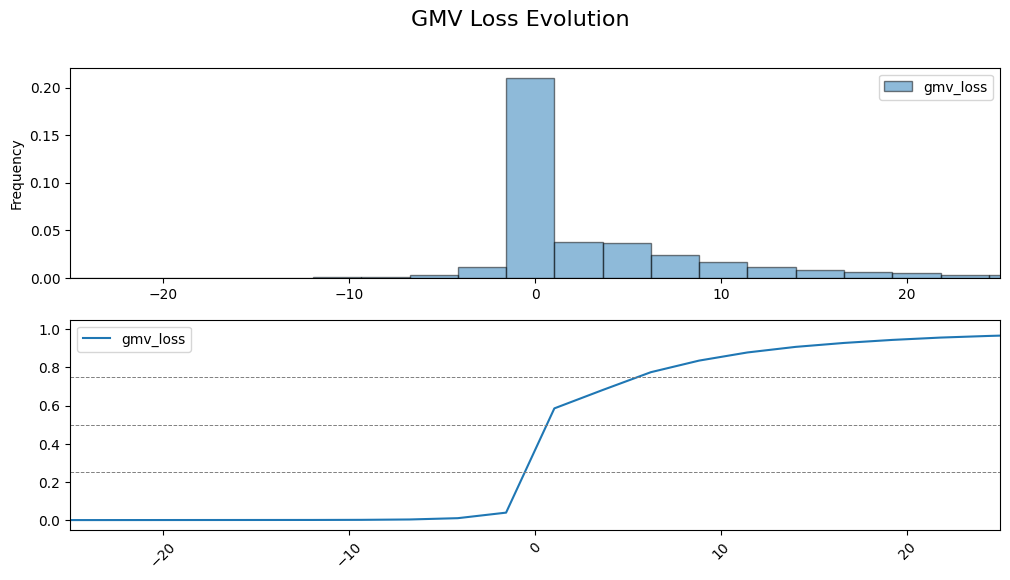

In [20]:
df.sort_values(by='p_creation_date', inplace=True)

# Create an instance of DataFrameVisualizer
v = dataframe_visualizer.DataFrameVisualizer(df)

# Define the plot configurations for each subplot
plot_params = [
    {
        'plot_type': 'histogram', 
        'y_columns': ['gmv_loss'],
        'colors': ['blue'], # default None
        'bins'  : 200,   
        'legend': True # default True
    },
    {
        'plot_type': 'histogram_acummulated', 
        'y_columns': ['gmv_loss'],
        'colors': ['blue'], # default None
        'bins'  : 200,   
        'legend': True # default True
    },
]

figure_params = {
    'n_plots': 2, # default 1
    'fig_length': 12, # default 10
    'fig_height': 6, # default 6
    'x_rotation': 45, # default 45
    'share_x': False, # default False
    'share_y': False, # default False
    'x_limits': [(-25, 25),(-25,25)], # default None
    'title': 'GMV Loss Evolution', # default None
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)


# Make 3 new groups 

1 - From mid-November to December

2 - From mid-October to mid-November

3 - From mid-November to December last year

In [21]:
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

df['g1'] = df.apply(lambda row: row['gmv_loss'] if pd.Timestamp('2024-11-16') <= row['p_creation_date'] < pd.Timestamp('2024-12-16') else None, axis=1)
df['g2'] = df.apply(lambda row: row['gmv_loss'] if pd.Timestamp('2024-10-16') <= row['p_creation_date'] < pd.Timestamp('2024-11-16') else None, axis=1)
df['g3'] = df.apply(lambda row: row['gmv_loss'] if pd.Timestamp('2023-11-16') <= row['p_creation_date'] < pd.Timestamp('2023-12-16') else None, axis=1)

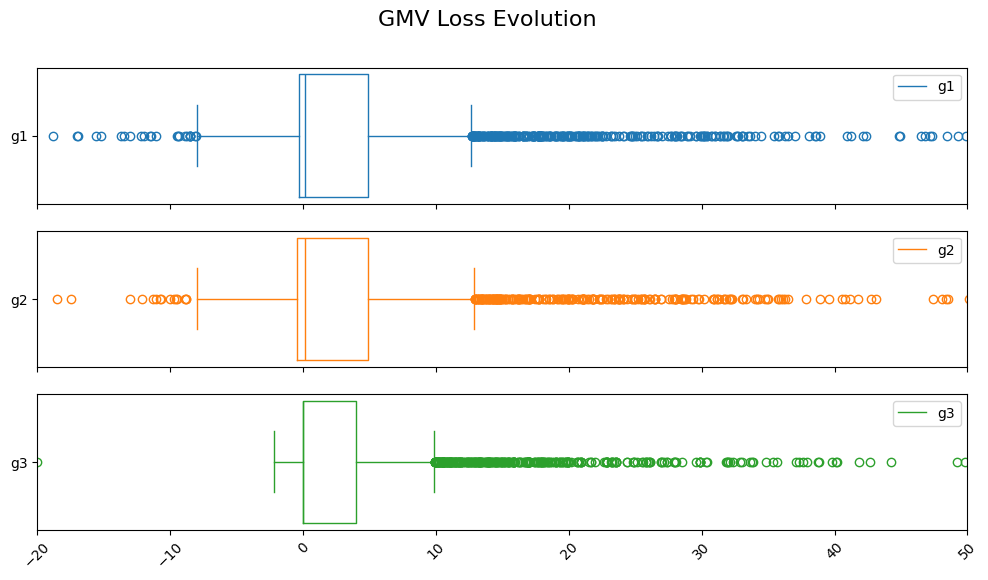

In [22]:
df.sort_values(by='p_creation_date', inplace=True)

# Create an instance of DataFrameVisualizer
v = dataframe_visualizer.DataFrameVisualizer(df)

# Define the plot configurations for each subplot
plot_params = [
    {
        'plot_type': 'boxplot_and_whiskers', 
        'y_columns': ['g1'],
        'colors': ['blue'], # default None
        'bins'  : 100,   
        'legend': True # default True
    },
    {
        'plot_type': 'boxplot_and_whiskers', 
        'y_columns': ['g2'],
        'colors': ['orange'], # default None
        'bins'  : 100,   
        'legend': True # default True
    },
    {
        'plot_type': 'boxplot_and_whiskers', 
        'y_columns': ['g3'],
        'colors': ['green'], # default None
        'bins'  : 100,   
        'legend': True # default True
    },
]

figure_params = {
    'n_plots': 3, # default 1
    'fig_length': 12, # default 10
    'fig_height': 6, # default 6
    'x_rotation': 45, # default 45
    'share_x': True, # default False
    'share_y': False, # default False
    'x_limits': [(-20,50),(-20,50),(-20,50)], # default None
    'title': 'GMV Loss Evolution', # default None
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)


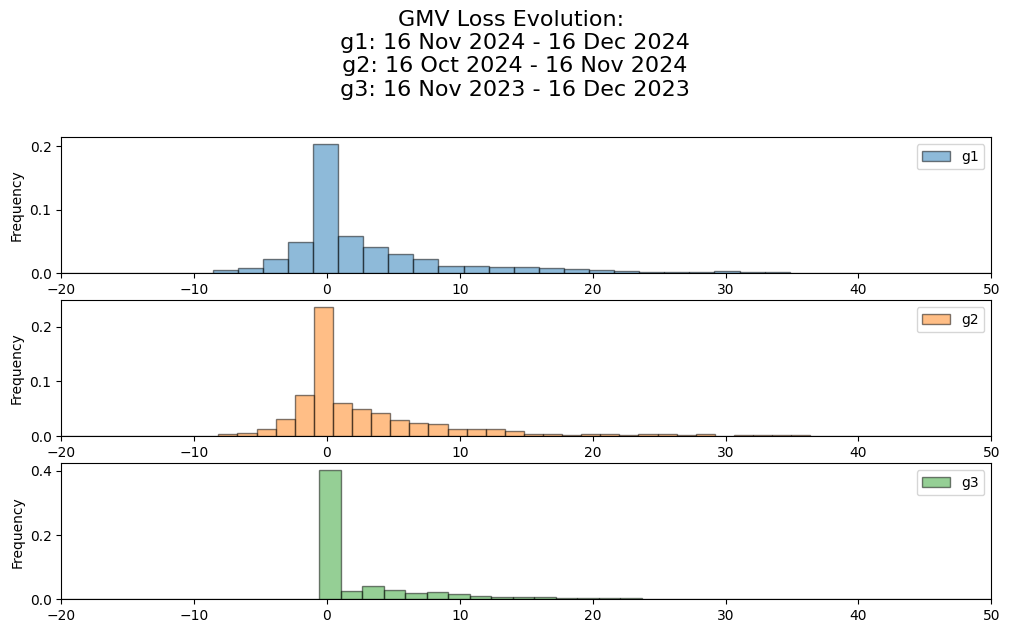

In [23]:
df.sort_values(by='p_creation_date', inplace=True)

# Create an instance of DataFrameVisualizer
v = dataframe_visualizer.DataFrameVisualizer(df)

# Define the plot configurations for each subplot
plot_params = [
    {
        'plot_type': 'histogram', 
        'y_columns': ['g1'],
        'colors': ['blue'], # default None
        'bins'  : 100,   
        'legend': True # default True
    },
    {
        'plot_type': 'histogram', 
        'y_columns': ['g2'],
        'colors': ['orange'], # default None
        'bins'  : 100,   
        'legend': True # default True
    },
    {
        'plot_type': 'histogram', 
        'y_columns': ['g3'],
        'colors': ['green'], # default None
        'bins'  : 100,   
        'legend': True # default True
    },
]

figure_params = {
    'n_plots': 3, # default 1
    'fig_length': 12, # default 10
    'fig_height': 6, # default 6
    'x_rotation': 45, # default 45
    'share_x': False, # default False
    'share_y': False, # default False
    'x_limits': [(-20,50),(-20,50),(-20,50)], # default None
    'title': 'GMV Loss Evolution:\n g1: 16 Nov 2024 - 16 Dec 2024\n g2: 16 Oct 2024 - 16 Nov 2024\n g3: 16 Nov 2023 - 16 Dec 2023', # default None
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)


# Numbers to report

In [24]:
# Count number of orders in each group
df['g1'].count(), df['g2'].count(), df['g3'].count()

(np.int64(2929), np.int64(2876), np.int64(3035))

In [25]:
# Mean of GMV loss in each group
df['g1'].mean(), df['g2'].mean(), df['g3'].mean()

(np.float64(3.45526459542506),
 np.float64(3.5027712100139086),
 np.float64(3.4439967051070837))

# Number to report (filter for GMV loss >0, so no GMV saved allowed)

In [26]:
df_no_save = df[df['gmv_loss']>=0].copy()

In [27]:
# Count number of orders in each group
df_no_save['g1'].count(), df_no_save['g2'].count(), df_no_save['g3'].count()

(np.int64(2088), np.int64(1952), np.int64(3030))

In [28]:
# Count number of orders in each group
df_no_save['g1'].mean(), df_no_save['g2'].mean(), df_no_save['g3'].mean()

(np.float64(5.8516666666666675),
 np.float64(6.058483606557377),
 np.float64(3.457910891089109))